# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

###  1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

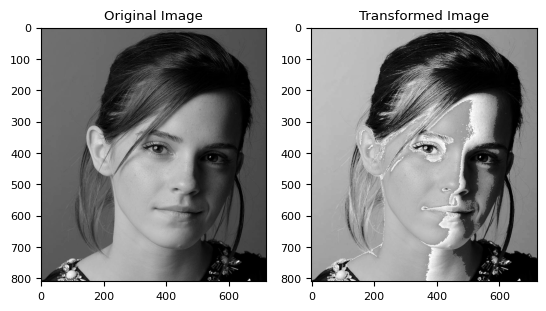

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (Grayscale)
img1 = cv2.imread('a1images/emma.jpg', 0)  # 0 to load in grayscale

# Create an empty array for the transformed image
new_img = np.zeros_like(img1)

width, height = img1.shape

# Apply the transformation
for i in range(width):
    for j in range(height):
        pixel = img1[i, j]
        if pixel < 50:
            new_img[i, j] = pixel
        elif 50 <= pixel <= 150:
            new_img[i, j] = 1.55*pixel + 22.5
        else:
            new_img[i, j] = pixel

# Plot original and transformed images
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(new_img, cmap='gray')
plt.title('Transformed Image')
plt.show()


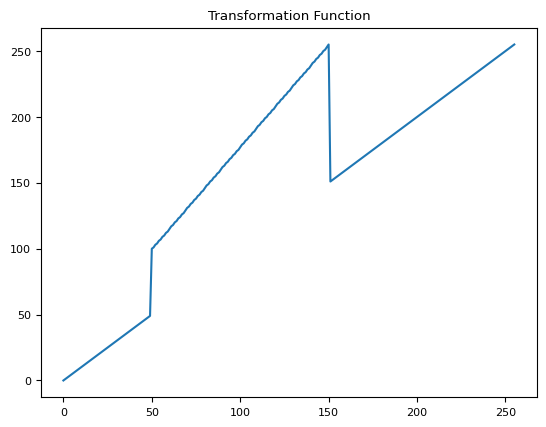

In [41]:
# plot the transformation function
x = np.arange(0, 256)
y = np.piecewise(x, [x < 50, (50 <= x) & (x <= 150), x > 150], [lambda x: x, lambda x: 1.55*x + 22.5, lambda x: x])
plt.plot(x, y)
plt.title('Transformation Function')
plt.show()


### 2. Apply a similar operation as above to accentuate the white matter and gray matter in the brain proton density image. Show the intensity transformations as a plots

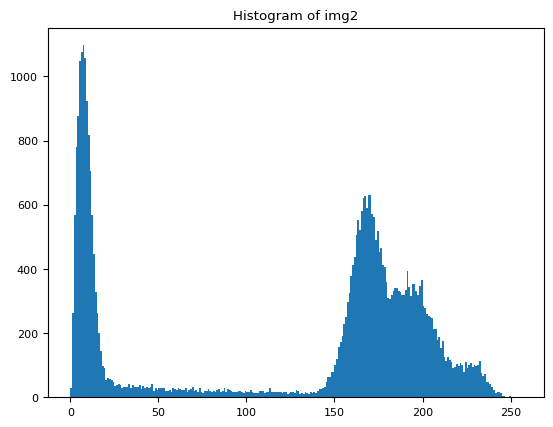

In [42]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', 0)  # 0 to load in grayscale

# plot the histogram of img2
plt.hist(img2.ravel(), 256, [0, 256])
plt.title('Histogram of img2')
plt.show()

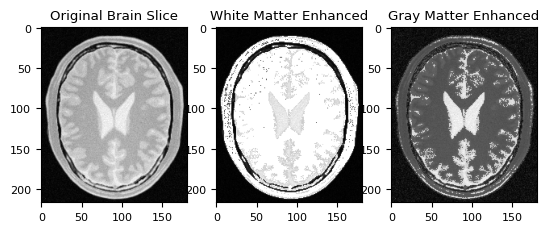

In [44]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', 0)  # 0 to load in grayscale

# Adjust the intensity ranges for white matter and gray matter
def transform_for_white_matter(pixel):
    if pixel < 150:  
        return pixel // 2  # Gray matter
    elif 150 <= pixel <= 200:  # Boost white matter
        return min(255, pixel * 2)  
    else:
        return pixel
    
def transform_for_gray_matter(pixel):
    if pixel < 50:  
        return min(255, pixel * 2)  # Boost gray matter
    elif 50 <= pixel <= 200:  # White matter
        return pixel // 2  
    else:
        return pixel

# Apply transformation
white_matter_img = np.array([[transform_for_white_matter(px) for px in row] for row in img2])
gray_matter_img = np.array([[transform_for_gray_matter(px) for px in row] for row in img2])

# Display images 
plt.rcParams.update({'font.size': 8})
plt.subplot(131), plt.imshow(img2, cmap='gray'), plt.title('Original Brain Slice')
plt.subplot(132), plt.imshow(white_matter_img, cmap='gray'), plt.title('White Matter Enhanced')
plt.subplot(133), plt.imshow(gray_matter_img, cmap='gray'), plt.title('Gray Matter Enhanced')
plt.show()

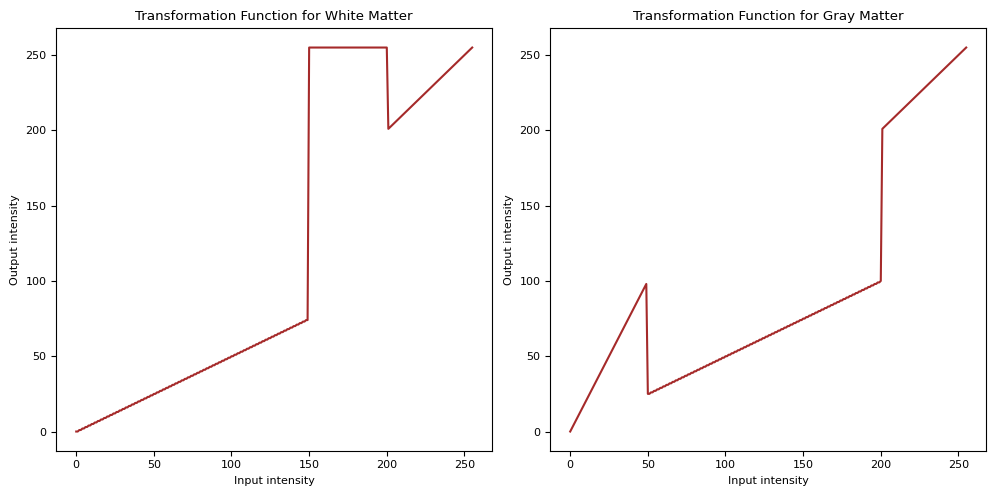

In [45]:
# Vectorize the functions so they can be applied to NumPy arrays
vec_transform_for_white_matter = np.vectorize(transform_for_white_matter)
vec_transform_for_gray_matter = np.vectorize(transform_for_gray_matter)

# Define the input range
x = np.arange(0, 256)

# Apply the transformations
y_white = vec_transform_for_white_matter(x)
y_gray = vec_transform_for_gray_matter(x)

# Plot the transformation functions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_white, color='brown')
plt.title('Transformation Function for White Matter')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.subplot(1, 2, 2)
plt.plot(x, y_gray, color='brown')
plt.title('Transformation Function for Gray Matter')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.tight_layout()
plt.show()


### 3. Applying Gamma Correction

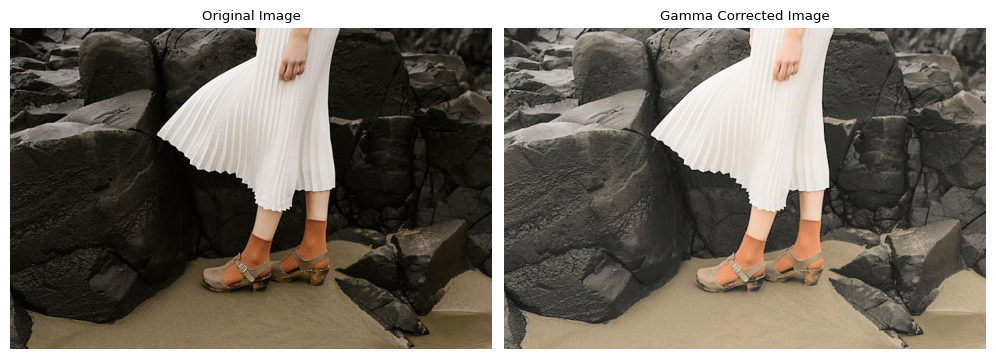

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img3 = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert to L*a*b* color space
lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(lab)

# Apply gamma correction to the L plane
gamma = 0.5  

L_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L plane with the original a and b planes
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert back to RGB color space
img_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB)  
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)  

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')  

plt.tight_layout()
plt.show()

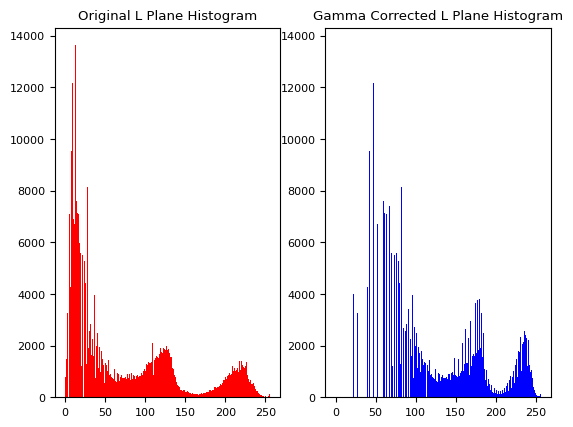

In [46]:
# Plot histograms
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(L.flatten(), bins=256, range=[0, 256], color='r')
plt.title('Original L Plane Histogram')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Gamma Corrected L Plane Histogram')

plt.show()

### Question 4

### (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

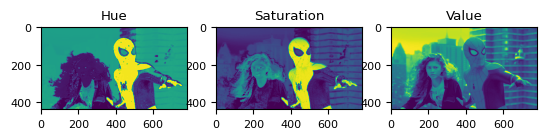

In [54]:
img4 = cv2.imread('a1images/spider.png')  

# Convert image to HSV
hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value channels
H, S, V = cv2.split(hsv)

# Plot
plt.subplot(1,3,1), plt.imshow(H), plt.title('Hue')
plt.subplot(1,3,2), plt.imshow(S), plt.title('Saturation')
plt.subplot(1,3,3), plt.imshow(V), plt.title('Value')
plt.show()


### (b) Apply the aforementioned intensity transformation to the saturation plane.

In [50]:
sigma = 70
a = 0.5  # Adjust this value for a pleasing output

def vibrance_enhance(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Apply the function to each pixel in the Saturation plane
S_enhanced = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')

###  (c) Adjust a to get a visually pleasing output. Report the value of a.

###  (d) Recombine the three planes.

In [55]:
# Merge the adjusted saturation with the original H and V planes
hsv_enhanced = cv2.merge([H, S_enhanced, V])

# Convert back to BGR color space
img_vibrance_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)


### (e) Display the original image, vibrance-enhanced image, and the intensity transformation.

In [ ]:
# Display the original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_vibrance_enhanced, cv2.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image')
plt.axis('off')

# Vectorize the vibrance_enhance function
vec_vibrance_enhance = np.vectorize(vibrance_enhance)

# Apply the vectorized function
y = vec_vibrance_enhance(x, a, sigma)

# Plot the transformation function
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='r')
plt.title('Transformation Function')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.tight_layout()
plt.show()

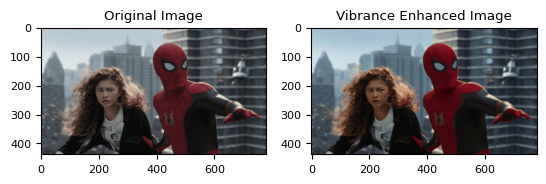

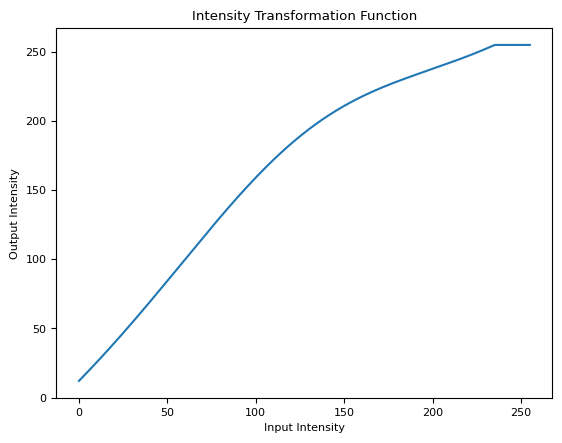

In [60]:
plt.subplot(121), plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_vibrance_enhanced, cv2.COLOR_BGR2RGB)), plt.title('Vibrance Enhanced Image')
plt.show()

x = np.arange(0, 256)
f_x = [vibrance_enhance(val, a, sigma) for val in x]

plt.plot(x, f_x)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()


###  5. Write a function of your own to carry out histogram equalization on the image

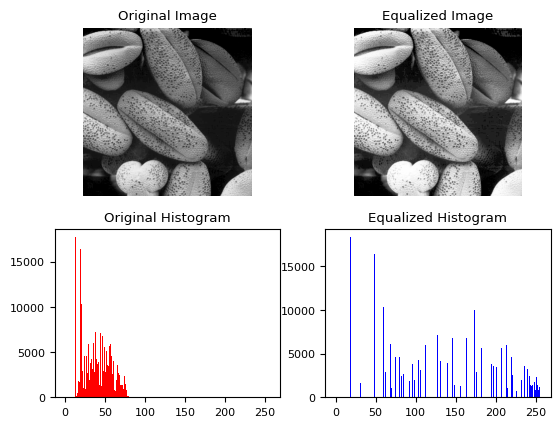

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Step 1: Calculate the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * (hist.max() / cdf.max())
    
    # Step 3: Normalize the CDF to map to [0, 255]
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zero values in CDF
    cdf_m = (cdf_m - cdf_min) * 255 / (cdf_max - cdf_min)
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    
    # Step 4: Use the CDF as a mapping to transform pixel values
    equalized_image = cdf_final[image]
    
    return equalized_image, hist, cdf_normalized

# Load the image (assuming it's grayscale for equalization)
img5 = cv2.imread('a1images/shells.tif', 0)

# Perform histogram equalization
equalized_img, hist_orig, cdf_orig = histogram_equalization(img5)

# Step 5: Show histograms before and after equalization
plt.subplot(2, 2, 1), plt.imshow(img5, cmap='gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 3), plt.hist(img5.flatten(), 256, [0, 256], color='r'), plt.title('Original Histogram')
plt.subplot(2, 2, 4), plt.hist(equalized_img.flatten(), 256, [0, 256], color='b'), plt.title('Equalized Histogram')
plt.show()


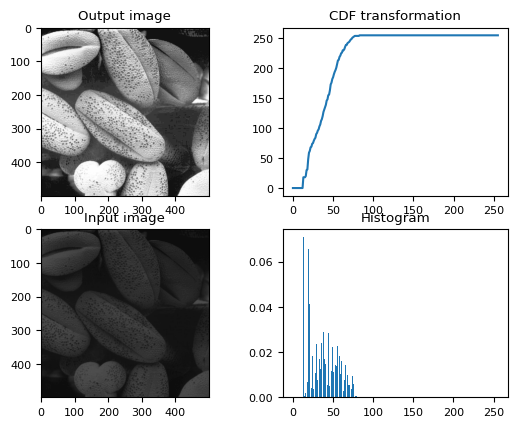

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rawImage = cv2.imread('a1images/shells.tif',0)

def transformation(img,tx):
    width, height = img.shape
    newImg = np.array((img))
    for i in range(width):
        for j in range(height):
            newImg[i,j]=tx[img[i,j]]
    return newImg

def imhistEq(img):
    width,height = img.shape
    hist = np.zeros((256))
    cdfTx = np.zeros((256))
    pixSum = 0
    for i in range(256):
        hist[i] = sum(sum(img==i))
        pixSum += hist[i]
        cdfTx[i] = pixSum
    hist = hist/(width*height)
    cdfTx = cdfTx*255/(width*height)
    cdfTx = cdfTx.astype(np.uint8)
    return hist,cdfTx

hist, cdfTx = imhistEq(rawImage)
hCimage = transformation(rawImage,cdfTx)

x=np.arange(256)
plt.subplot(2,2,1)
plt.title('Output image')
plt.imshow(hCimage,cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.plot(x, cdfTx)
plt.title('CDF transformation')
plt.subplot(2,2,3)
plt.imshow(rawImage,cmap='gray', vmin=0, vmax=255)
plt.title('Input image')
plt.subplot(2,2,4)
plt.title('Histogram')

plt.bar(x,hist)
plt.show()

### 6. Apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.

### a. Split it into hue, saturation, and values and display these planes in grayscale.

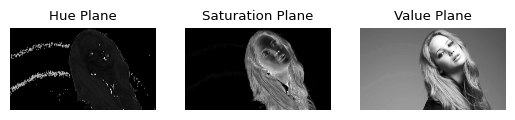

In [73]:
# Load the image and convert it to HSV color space
img6 = cv2.imread('a1images/jeniffer.jpg')  # Load in color mode
hsv = cv2.cvtColor(img6, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
H, S, V = cv2.split(hsv)

# Display the Hue, Saturation, and Value planes in grayscale
plt.subplot(1, 3, 1), plt.imshow(H, cmap='gray'), plt.title('Hue Plane')
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(S, cmap='gray'), plt.title('Saturation Plane')
plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(V, cmap='gray'), plt.title('Value Plane')
plt.axis('off')
plt.show()


### (b) Select the appropriate plane to threshold in extract the foreground mask. 

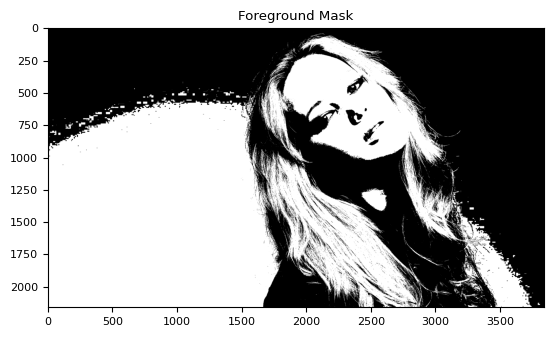

In [74]:
# Threshold the Value plane to create a mask (binary image)
_, mask = cv2.threshold(V, 120, 255, cv2.THRESH_BINARY)

# Display the binary mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()


###  (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.

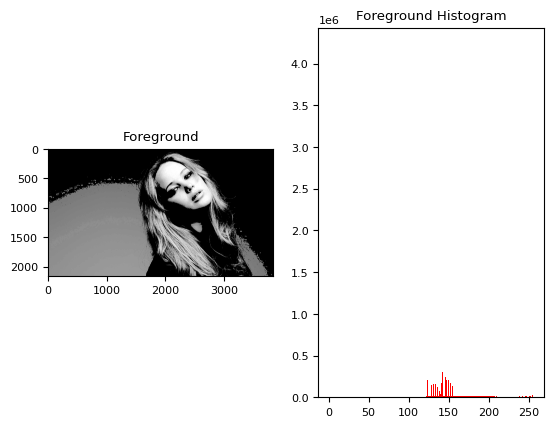

In [75]:
# Use the mask to isolate the foreground
foreground = cv2.bitwise_and(V, V, mask=mask)

# Compute the histogram of the foreground
hist_foreground, _ = np.histogram(foreground.flatten(), 256, [0, 256])

# Display the foreground and its histogram
plt.subplot(1, 2, 1), plt.imshow(foreground, cmap='gray'), plt.title('Foreground')
plt.subplot(1, 2, 2), plt.hist(foreground.flatten(), 256, [0, 256], color='r'), plt.title('Foreground Histogram')
plt.show()


###  (d) Obtain the cumulative sum of the histogram using np.cumsum.

In [76]:
# Calculate the cumulative sum (CDF) of the histogram
cdf_foreground = np.cumsum(hist_foreground)

# Normalize the CDF
cdf_min = cdf_foreground.min()
cdf_max = cdf_foreground.max()
cdf_foreground_normalized = (cdf_foreground - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_foreground_normalized = cdf_foreground_normalized.astype('uint8')


###  (e) Use the formulas in slides to histogram-equalize the foreground.

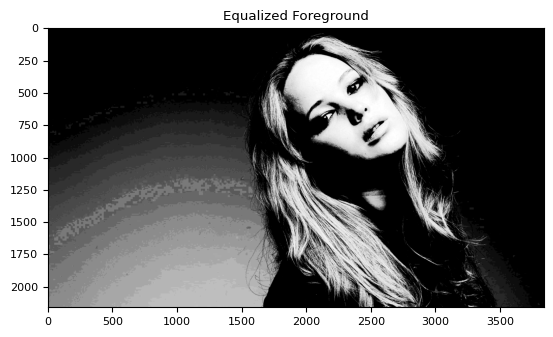

In [77]:
# Apply the histogram equalization formula to the foreground
equalized_foreground = cdf_foreground_normalized[foreground]

# Display the equalized foreground
plt.imshow(equalized_foreground, cmap='gray')
plt.title('Equalized Foreground')
plt.show()


###  (f) Extract the background and add with the histogram equalized foreground

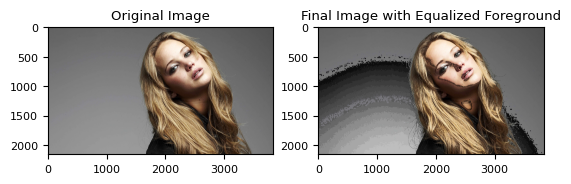

In [79]:
# Extract the background using the inverse of the mask
background = cv2.bitwise_and(V, V, mask=cv2.bitwise_not(mask))

# Combine the equalized foreground with the background
combined = cv2.add(equalized_foreground, background)

# Merge the Hue, Saturation, and modified Value planes
hsv_combined = cv2.merge([H, S, combined])

# Convert back to BGR color space
final_image = cv2.cvtColor(hsv_combined, cv2.COLOR_HSV2BGR)

# Display the original and final images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)), plt.title('Final Image with Equalized Foreground')
plt.show()


### 7. Filtering with the Sobel Operator

### (a) Using Existing 2D Sobel Filter in OpenCV

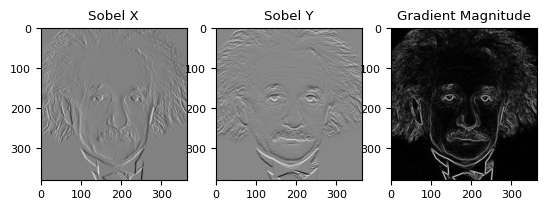

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
img7 = cv2.imread('a1images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter in the x direction (horizontal edges)
sobel_x = cv2.Sobel(img7, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in the y direction (vertical edges)
sobel_y = cv2.Sobel(img7, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display the results
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()

### (b) Write Code to Manually Apply Sobel Filter

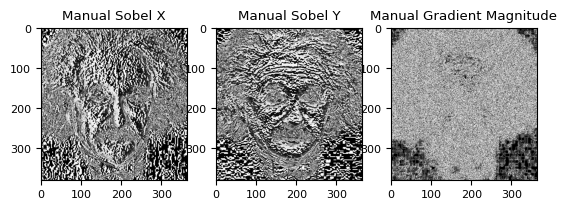

In [85]:
from scipy.ndimage import convolve

# Define Sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Manually apply Sobel filter in x and y directions using convolution
sobel_x_manual = convolve(img7, sobel_x_kernel)
sobel_y_manual = convolve(img7, sobel_y_kernel)

# Compute the gradient magnitude
sobel_manual_combined = np.sqrt(sobel_x_manual**2 + sobel_y_manual**2)

# Display the results
plt.subplot(1, 3, 1), plt.imshow(sobel_x_manual, cmap='gray'), plt.title('Manual Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y_manual, cmap='gray'), plt.title('Manual Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_manual_combined, cmap='gray'), plt.title('Manual Gradient Magnitude')
plt.show()


### (c) Using the Property Shown in the Image (Separable Sobel Filter)

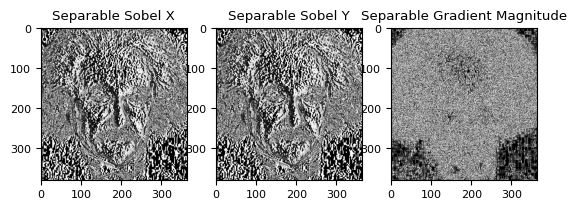

In [87]:
# 1D filters
vertical_filter = np.array([[1], [2], [1]])
horizontal_filter = np.array([[1, 0, -1]])

# Apply the 1D filters separately
sobel_x_separable = convolve(img7, horizontal_filter)
sobel_x_separable = convolve(sobel_x_separable, vertical_filter)

sobel_y_separable = convolve(img7, vertical_filter)
sobel_y_separable = convolve(sobel_y_separable, horizontal_filter)

# Compute the gradient magnitude
sobel_separable_combined = np.sqrt(sobel_x_separable**2 + sobel_y_separable**2)

# Display the results
plt.subplot(1, 3, 1), plt.imshow(sobel_x_separable, cmap='gray'), plt.title('Separable Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y_separable, cmap='gray'), plt.title('Separable Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_separable_combined, cmap='gray'), plt.title('Separable Gradient Magnitude')
plt.show()


### 8. Zooming Images with Nearest-Neighbor and Bilinear Interpolation

### a) Nearest-Neighbor Interpolation Function

In [88]:
import cv2
import numpy as np

def zoom_nearest_neighbor(img, scale_factor):
    # Get the dimensions of the original image
    height, width = img.shape[:2]
    
    # Calculate new dimensions
    new_height, new_width = int(height * scale_factor), int(width * scale_factor)
    
    # Create an empty image with new dimensions
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=img.dtype)
    
    # Apply nearest-neighbor interpolation
    for i in range(new_height):
        for j in range(new_width):
            # Map the new pixel coordinates to the nearest original pixel
            orig_x = int(i / scale_factor)
            orig_y = int(j / scale_factor)
            zoomed_image[i, j] = img[orig_x, orig_y]
    
    return zoomed_image

# Load image and zoom using nearest-neighbor interpolation
img8 = cv2.imread('a1image/daisy.jpg')  # Load your image
scale_factor = 4  # Zoom factor
zoomed_nn = zoom_nearest_neighbor(img8, scale_factor)

# Display the zoomed image
cv2.imshow("Nearest Neighbor Zoom", zoomed_nn)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'